In [8]:
import sys, os, csv, glob
import matplotlib.pyplot as plt 
import numpy as np

folder_n = 'C:/Users/Bum/Desktop/MMMIL/RF/RF_data/07_24_1' # path of data_files 
fn = glob.glob(folder_n + '/*')

data = []
with open(fn[1],'r', encoding='utf-8') as f:
    reader = csv.reader(f) 
    for txt in reader :
        data.append(txt)

In [244]:
data_r = np.array(data, dtype='float64')*5/32768
print(data_r.shape)
data_s = data_r[2][:] # data selection

(3, 131072)


In [11]:
plt.rcParams["figure.figsize"] = (20,4)

In [1]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

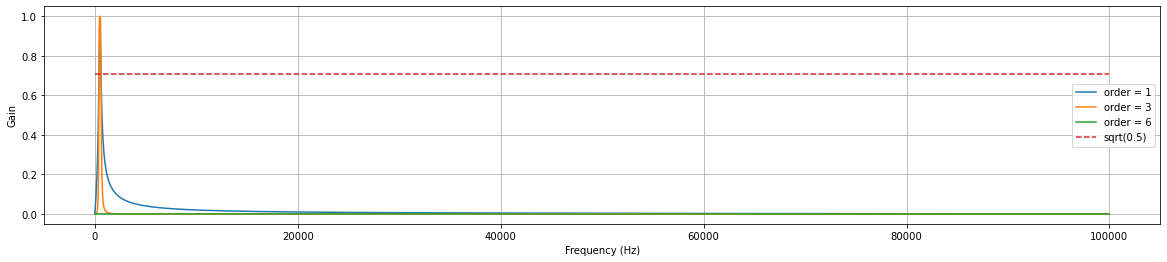

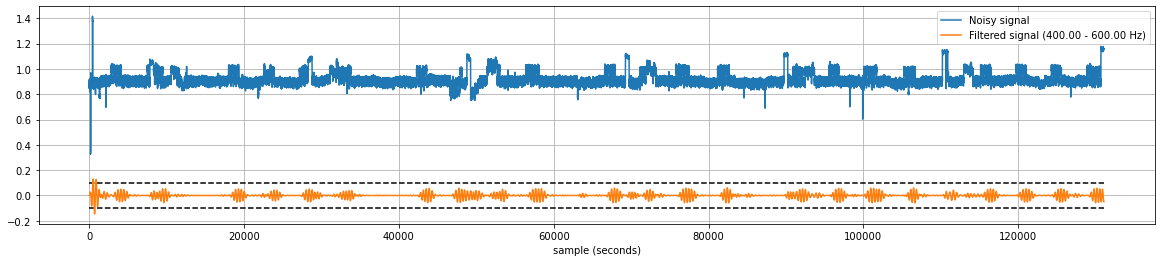

In [372]:
if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 200000
    lowcut = 400.0
    highcut = 600.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [1, 3, 6]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    #nsamples = int(T * fs)
    #t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.1
    
    f0 = 400.0
    f1 = 600.0
    data_s = data_r[2][:]
    plt.figure(2)
    plt.clf()
    plt.plot(data_s, label='Noisy signal')
    
    y = butter_bandpass_filter(data_s, lowcut, highcut, fs, order=3)
    plt.plot(y, label='Filtered signal (%0.2f - %0.2f Hz)' % (f0,f1))
    plt.xlabel('sample (seconds)')
    plt.hlines([-a, a], 0, len(data_s), linestyles='--')
    plt.grid(True)
    #plt.axis('tight')
    plt.legend(loc='best')
    
    plt.show() 

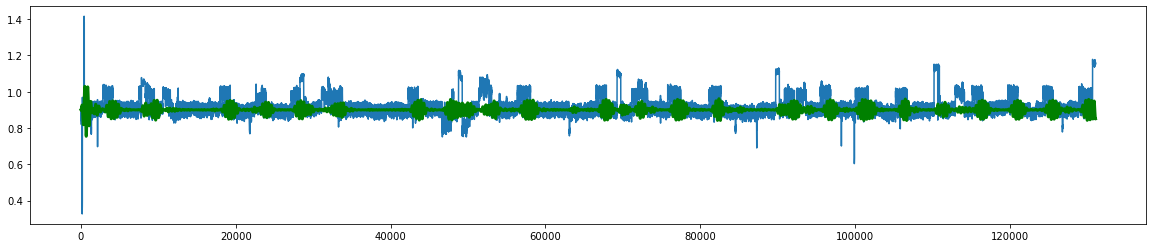

In [371]:
fs = 200000
lowcut = 400
highcut = 600
y = butter_bandpass_filter(data_s, lowcut, highcut, fs, order=3)+ 0.9
plt.plot(data_s, label='Noisy signal')
plt.plot(y, 'g-' ,label='Filtered signal (Hz)', linewidth = 3)

In [317]:
y*100

array([ 2.62490049e-06,  1.83521510e-05,  6.54618387e-05, ...,
       -3.24110936e+00, -3.28926272e+00, -3.33647364e+00])